In [1]:
# Instalação de dependências
# %pip install scikit-fuzzy
# %pip install networkx
# %pip install tabulate

# Instalação de dependências com base no requirements.txt
# %pip install -r ../requirements.txt

# PERCORRE NO MAXIMO 1KM de distancia

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
from tabulate import tabulate
import re

d:\Downloads\8° PERIODO\C213\C213-trabalho-2\C213venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


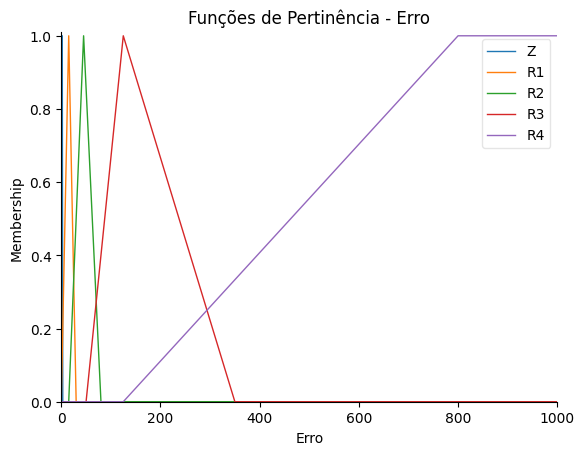

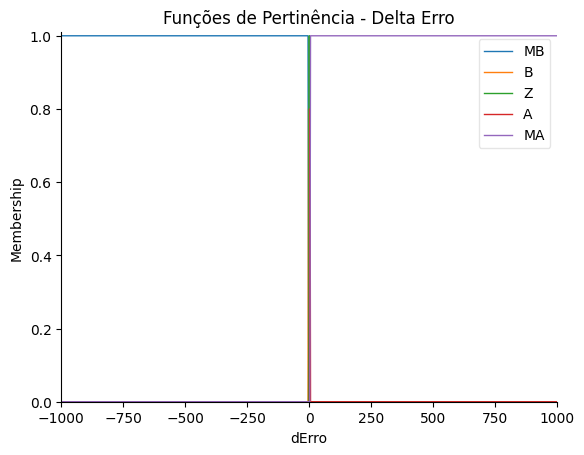

In [4]:
Erro = ctrl.Antecedent(universe=np.arange(0, 1001, 1), label='Erro')

# Definindo funções de pertinência para o erro
Erro['Z'] = fuzz.trapmf(Erro.universe, [0, 0, 2.5, 2.5])              # Zero Error
Erro['R1'] = fuzz.trimf(Erro.universe, [0, 15, 30])               # erro 1
Erro['R2'] = fuzz.trimf(Erro.universe, [15, 45, 80])                # Erro 2
Erro['R3'] = fuzz.trimf(Erro.universe, [50, 125, 350])               # Erro 3
Erro['R4'] = fuzz.trapmf(Erro.universe, [125, 800, 1000, 1000])     # Erro 4


dErro = ctrl.Antecedent(universe=np.arange(-1000, 1001, 1), label='dErro')

# Funções de pertinência para 'DeltaErro'
dErro['MB'] = fuzz.trapmf(dErro.universe, [-1000, -1000, -5, -2.5])  # Grande Negativo
dErro['B'] = fuzz.trimf(dErro.universe, [-5, -2.5, 0])               # Pequeno Negativo
dErro['Z'] = fuzz.trimf(dErro.universe, [-2.5, 0, 2.5])              # Estabilizado
dErro['A'] = fuzz.trimf(dErro.universe, [0, 2.5, 5])                 # Pequeno Positivo
dErro['MA'] = fuzz.trapmf(dErro.universe, [2.5, 5, 1000, 1000])      # Grande Positivo


# Plot para Erro
Erro.view()
plt.title('Funções de Pertinência - Erro')
plt.show()
# Plot para Delta Erro
dErro.view()
plt.title('Funções de Pertinência - Delta Erro')

plt.show()

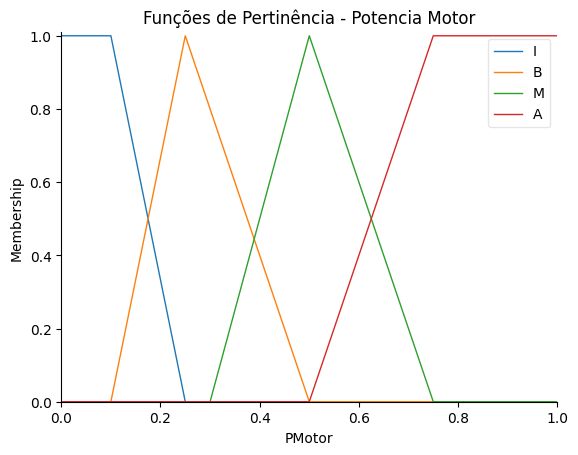

In [5]:
PotenciaMotor = ctrl.Consequent(universe=np.arange(0, 1.01, 0.01), label='PMotor')

# Funções de pertinência para PMotor -----> PHn,m ⊂ [0, 1]
PotenciaMotor['I'] = fuzz.trapmf(PotenciaMotor.universe, [0, 0, 0.1, 0.25])       # Potência Inicio
PotenciaMotor['B'] = fuzz.trimf(PotenciaMotor.universe, [0.10, 0.25, 0.50])         # Potência Baixa
PotenciaMotor['M'] = fuzz.trimf(PotenciaMotor.universe, [0.30, 0.50, 0.75])         # Potência Média
PotenciaMotor['A'] = fuzz.trapmf(PotenciaMotor.universe, [0.50, 0.75, 1, 1])   # Potência Alta


# Plot para Delta Erro
PotenciaMotor.view()
plt.title('Funções de Pertinência - Potencia Motor')

plt.show()

In [6]:
# Base de Regras corrigida
R1 = ctrl.Rule(Erro['Z'] & dErro['MB'], PotenciaMotor['I'])  # Z + MP -> MP
R2 = ctrl.Rule(Erro['Z'] & dErro['B'], PotenciaMotor['B'])    # Z + P -> P
R3 = ctrl.Rule(Erro['Z'] & dErro['Z'], PotenciaMotor['M'])   # Z + Z -> MP
R4 = ctrl.Rule(Erro['Z'] & dErro['A'], PotenciaMotor['A'])    # Z + N -> M
R5 = ctrl.Rule(Erro['Z'] & dErro['MA'], PotenciaMotor['A'])  # Z + MN -> MG

R6 = ctrl.Rule(Erro['R1'] & dErro['MB'], PotenciaMotor['I'])  # P + MP -> MP
R7 = ctrl.Rule(Erro['R1'] & dErro['B'], PotenciaMotor['B'])    # P + P -> P
R8 = ctrl.Rule(Erro['R1'] & dErro['Z'], PotenciaMotor['M'])    # P + Z -> P
R9 = ctrl.Rule(Erro['R1'] & dErro['A'], PotenciaMotor['M'])    # P + N -> G
R10 = ctrl.Rule(Erro['R1'] & dErro['MA'], PotenciaMotor['M'])  # P + MN -> M

R11 = ctrl.Rule(Erro['R2'] & dErro['MB'], PotenciaMotor['B'])  # M + MP -> P
R12 = ctrl.Rule(Erro['R2'] & dErro['B'], PotenciaMotor['B'])   # M + P -> G
R13 = ctrl.Rule(Erro['R2'] & dErro['Z'], PotenciaMotor['M'])   # M + Z -> M
R14 = ctrl.Rule(Erro['R2'] & dErro['A'], PotenciaMotor['M'])   # M + N -> G
R15 = ctrl.Rule(Erro['R2'] & dErro['MA'], PotenciaMotor['A']) # M + MN -> MG

R16 = ctrl.Rule(Erro['R3'] & dErro['MB'], PotenciaMotor['B']) # G + MP -> MP
R17 = ctrl.Rule(Erro['R3'] & dErro['B'], PotenciaMotor['M'])   # G + P -> P
R18 = ctrl.Rule(Erro['R3'] & dErro['Z'], PotenciaMotor['M'])   # G + Z -> G
R19 = ctrl.Rule(Erro['R3'] & dErro['A'], PotenciaMotor['A'])  # G + N -> MG
R20 = ctrl.Rule(Erro['R3'] & dErro['MA'], PotenciaMotor['A']) # G + MN -> MG

R21 = ctrl.Rule(Erro['R4'] & dErro['MB'], PotenciaMotor['M']) # MG + MP -> P
R22 = ctrl.Rule(Erro['R4'] & dErro['B'], PotenciaMotor['M'])  # MG + P -> P
R23 = ctrl.Rule(Erro['R4'] & dErro['Z'], PotenciaMotor['A'])  # MG + Z -> G
R24 = ctrl.Rule(Erro['R4'] & dErro['A'], PotenciaMotor['A']) # MG + N -> MG
R25 = ctrl.Rule(Erro['R4'] & dErro['MA'], PotenciaMotor['A'])# MG + MN -> MG

Base = [
    R1, R2, R3, R4, R5, R6, R7, R8, R9, R10,
    R11, R12, R13, R14, R15, R16, R17, R18, R19, R20,
    R21, R22, R23, R24, R25
]


In [7]:
# Inicialização da lista de tabelas
tabela = []

vermelho, verde, amarelo, azul, magenta, ciano = ['\033[91m', '\033[92m', '\033[93m', '\033[94m', '\033[95m', '\033[96m']

# Iteração pelos termos de Erro e dErro
for erro in Erro.terms:
    for derro in dErro.terms:
        for regra in Base:
            antecedente = str(regra).split('IF ')[1].split(' THEN')[0].replace('AND ', '')
            consequente = str(regra).split('IF ')[1].split(' THEN')[1].split('AND ')[0]

            classificacoes = re.findall(r'\[(.*?)\]', (antecedente + consequente))
            if erro == classificacoes[0] and derro == classificacoes[1]:
                tabela.append([classificacoes[0], classificacoes[1], classificacoes[2]])
                break  # Sai do loop de regras após encontrar uma correspondência

# Criação do DataFrame
df = pd.DataFrame(tabela, columns=['Erro', 'dErro', 'PotenciaMotor'])

# Criação da pivotTable
pivotTable = pd.DataFrame(df.pivot(index='dErro', columns='Erro', values='PotenciaMotor')
                          .reindex(index=dErro.terms, columns=Erro.terms))

# Configuração do nome do índice com o título em azul
pivotTable.index.name = f'\033[94mDeltaErro/erro\033[0m'  # Adiciona cor azul ao título

# IMAressão da tabela formatada

print(tabulate(pivotTable, headers='keys', tablefmt='fancy_grid', stralign='center', showindex='always'))

╒══════════════════╤═════╤══════╤══════╤══════╤══════╕
│  DeltaErro/erro  │  Z  │  R1  │  R2  │  R3  │  R4  │
╞══════════════════╪═════╪══════╪══════╪══════╪══════╡
│        MB        │  I  │  I   │  B   │  B   │  M   │
├──────────────────┼─────┼──────┼──────┼──────┼──────┤
│        B         │  B  │  B   │  B   │  M   │  M   │
├──────────────────┼─────┼──────┼──────┼──────┼──────┤
│        Z         │  M  │  M   │  M   │  M   │  A   │
├──────────────────┼─────┼──────┼──────┼──────┼──────┤
│        A         │  A  │  M   │  M   │  A   │  A   │
├──────────────────┼─────┼──────┼──────┼──────┼──────┤
│        MA        │  A  │  M   │  A   │  A   │  A   │
╘══════════════════╧═════╧══════╧══════╧══════╧══════╛


In [8]:
Controle_Fuzz = ctrl.ControlSystemSimulation(ctrl.ControlSystem(Base))

In [9]:
Pos_Atual = 0


def calcular_d(F_A, Posiçao, U_max, P1, P2):
    # Simplificando a fórmula para evitar crescimento descontrolado
    d_t =   (F_A * Posiçao * 1.01398 + 0.5 * (U_max * P1 + U_max*P2))
    return d_t


def Subir_e_Descer(Pos_Final):

    dt = 1
    Umax = 6
    global Pos_Atual
    positions = [Pos_Atual]
    errors = [abs(Pos_Final - Pos_Atual)]
    for t in np.arange(1,500, 1):


        ErroAtual = abs(Pos_Final - Pos_Atual)
        errors.append(ErroAtual)

        if ErroAtual < 12:
            FA = 0.98
        else:
            FA = 0.99

        Controle_Fuzz.input['Erro'] = ErroAtual
        DeltaErroAtual = (errors[-1] - errors[-2]) / dt
        Controle_Fuzz.input['dErro'] = DeltaErroAtual
        Controle_Fuzz.compute()
        Potencia = Controle_Fuzz.output['PMotor']

        if ErroAtual > 5:
            P12 = Potencia
            P34 = Potencia
        else:
            P12 = 0.25
            P34 = 0.25


        dt = calcular_d(FA, Pos_Atual, Umax, P12, P34)

        if Pos_Atual < Pos_Final:
            Pos_Atual = dt
        else:
            delta_movement = dt - Pos_Atual
            Pos_Atual = Pos_Atual - delta_movement

    # Impressão dos resultados para visualização durante a simulação
        #print(f'ErroAtual: {ErroAtual:.2f} dErroAtual: {DeltaErroAtual:.2f} ->  posicaoAtual: {Pos_Atual:.2f}')

        positions.append(Pos_Atual)

    plt.plot(range(len(positions)), positions,"b")
    plt.show()


iniciando o drone e subindo


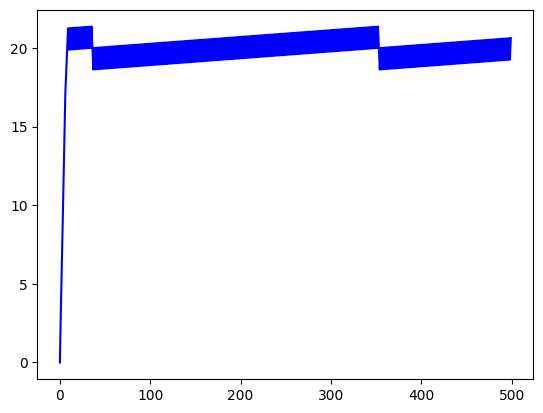

20.0

In [10]:
def ligar():
    print("iniciando o drone e subindo")
    altura = float(input("Digite a altura -> "))
    Subir_e_Descer(altura)
    return altura


ligar()

In [11]:
casa = 0


# Função para definir a posição inicial (set_home)
def set_home():
    casa = Pos_Atual
    print(f"Casa definida para: {casa} metros.")
    return casa


# Função para mover o drone até a casa (posição inicial)
def go_to_home(casa):
        print(f"Movendo de {Pos_Atual} para {casa}.")
        Subir_e_Descer(casa)

iniciando o drone e subindo


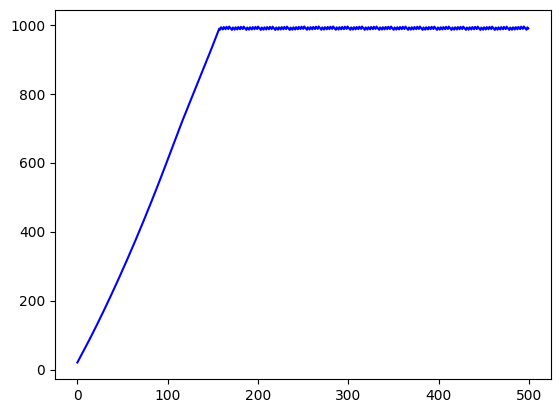

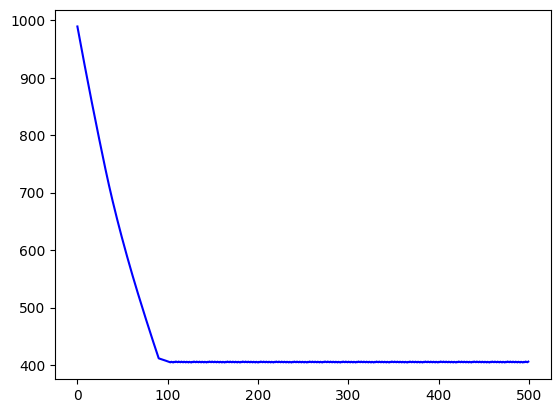

Casa definida para: 405.88494172738285 metros.


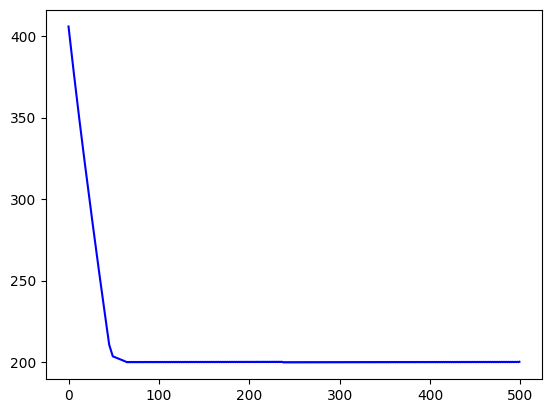

Movendo de 200.1980930371234 para 405.88494172738285.


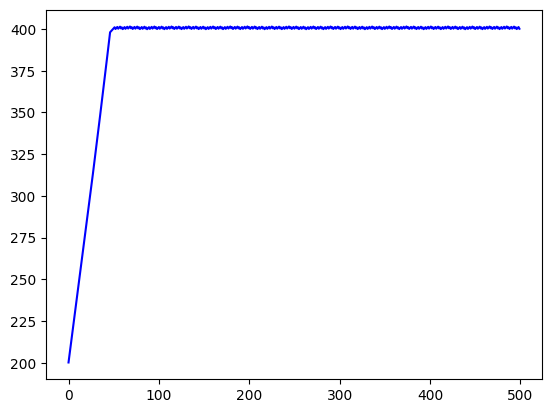

In [12]:
ligar()
Subir_e_Descer(400)
casa = set_home()
Subir_e_Descer(200)
go_to_home(casa)